# CNN(Convolutional Neural Network)

- 합성곱 층(Convolution layer) 과 완전 연결 층(Dense layer)의 차이

  - 완전 연결 층은 입력 이미지 전역 패턴 학습하지만, 합성곱 층은 입력 이미지 지역 패턴 학습한다.
  - 특징
    - 평행이동 불변성: 평행이동 된 지역 패턴은 같은 패턴으로 인식한다. <br> 이는 합성곱 신경망이 효율적으로 지역 패턴 학습하게 한다. <br> 또, 인간 두뇌가 객체 인식하는 방법과 같다.
    - 객체를 계층적 인식: 컨브넷은 객체를 계층적으로 인식한다. <br> 각 위치 에지, 질감에서 시작해서 귀, 코, 눈 등 더 상위 개념을 순차.계층적으로 인식해간다. <br> 두뇌가 객체 인식하는 방법과 같다.

- 합성곱 연산
  - 합성곱 층은 입력 이미지 받아 합성곱 연산 수행하고, 결과 출력한다.
  - 합성곱 연산은 입력 이미지 모든 위치에서 지역 패턴들 추출한다.
  - 지역패턴에는 에지(Edge), 질감(Texture) 등 포함된다.

- 합성곱 연산 과정
  1. 입력 이미지 위를 3 × 3 또는 5 × 5 크기 윈도우가 슬라이딩(Sliding) 하며 3 × 3 또는 5 × 5 크기 패치(Patch:작은 조각) 
추출한다. <br> (윈도우 사이즈 크기 패치 추출한다)
  2. 각 패치와. 에지, 질감 등 지역 특징 담고있는 필터(또는 커널)를 요소별 텐서 곱 연산 한다.
  3. 텐서 곱 연산 결과 모두 합한다. 곧, 2 과정은 패치 각 요소를 가중합 한 것과 같다.
  4. <3> 결과를 특성 맵(Feature Map) 또는 응답 맵(Responsse Map) 이라고 한다. <br> 입력 이미지 각 위치에 그 필터 패턴이 
나타나 있었는지 확인. 응답한 결과다.
  5. 입력 이미지 각 채널(예: RGB 3개) 별로 각각 다른 필터 적용된다.
    - 1개 합성곱 층에서 입력 이미지에 대해 여러 개 필터 적용한다(예: 32개, 64개, 128개…).
    - 보통 1개 합성곱 층 필터 개수는 하위 층에서 상위 층 갈 수록 2 제곱 수로 점차 증가시켜 간다.
    - 일반 경우, 합성곱 하위 층에서 상위 층(더 깊은 층) 갈 수록, 각 층의 출력 특성 맵 크기는 줄어든다.

- 패딩
  - Zero Padding
    - 입력 특성 맵과 출력 특성 맵 크기를 같게 하고 싶으면 입력 특성 맵에 패딩(Padding) 추가하면 된다.
    - 입력 특성 맵 가장자리에 적절한 개수 행과 열 추가하는 걸 패딩이라 한다.
    - 패딩 자리에 보통 0 넣기 때문에, 제로 패딩 이라고도 한다.
    - 위 행렬에 대해 합성곱 하면 출력 특성 맵 크기가 입력 특성 맵과 같아진다 (5∗5)

- 케라스에서 패딩 사용하기
  - Conv2D 층에서 padding 파라미터 설정하면 된다. ‘valid’ 는 패딩 사용 안함, ‘same’은 패딩 사용함 이다.
  - 기본 파라미터는 valid (패딩 사용 안함) 이다

- 스트라이드(Stride): 보폭
  - 연속한 두 윈도우 사이 거리를 스트라이드 라고 한다.
  - 스트라이드 값 기본은 1이다.

- 최대 풀링 연산
  - 합성 곱 층 출력 특성맵 받아 다운샘플링(행렬 크기 줄이기) 하는 연산이다.
  - 2∗2 윈도우와 스트라이드 2 사용해서, 패치 별로 최댓값만 추출한다.

- 최대 풀링 연산 목적
  - 입력을 다운샘플링 해서, 특성 맵 가중치 개수를 줄인다.
  - 모델이 공간적 계층 구조 학습하는 걸 돕는다

## 간단한 컨브넷 만들기

### MNIST 이미지 분류하는 간단한 컨브넷 만들기

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_10 (Flatten)        (None, 576)              

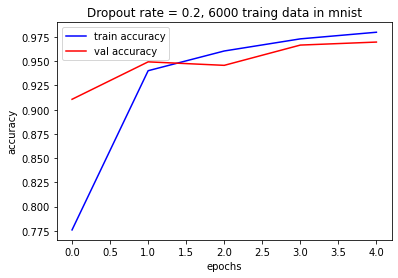

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
#1
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# subsampling for overfitting
n_sample = 6000
x_train = x_train[:n_sample]
y_train = y_train[:n_sample]

#2:normalize images
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255.0 # [0, 1]
x_test  /= 255.0

#3: one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train) # (n_sample, 10)
y_test = tf.keras.utils.to_categorical(y_test)   # (10000,    10)

#4: build a model with dropout
act = "sigmoid"
# act = "relu"
init = "he_uniform"

# 간단한 컨브넷 작성
# 이미지 특징 추출 층(합성곱 기반 층)
model = models.Sequential()
# 필터 수, 패치 사이즈(3*3), 요소별 적용할 활성화 함수, 입력 특성 맵 사이즈
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
# activation='relu' : 음수와 0은 모두 0, 양수값만 남김
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())  # 특성공학 결과물 1차원 텐서(벡터)로 변환하는 층

# 완전 연결 분류기
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 출력층 : 최상위층, 분류 결과물 확률 꼴로 변환

# 모델 설계 결과 요약
model.summary()

#4-1: configure the model for training
##opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
# 모델 컴파일(학습 준비 - Optimizer, loss function, 성능 측정 metric 지정)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#4-2: train and evaluate the model
# 모델 학습
ret = model.fit(x_train, y_train, epochs=5, batch_size=64,
                validation_data = (x_test, y_test), verbose=0)

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc   = model.evaluate(x_test,  y_test, verbose=2)

#4-3: plot accuracies
plt.title("Dropout rate = %s, %s traing data in mnist"%(dropout_rate, n_sample))
plt.plot(ret.history['accuracy'],     "b-", label="train accuracy")
plt.plot(ret.history['val_accuracy'], "r-", label="val accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="best")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

#1
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#2:normalize images
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255.0 # [0, 1]a
x_test  /= 255.0

#3: one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train) # (50000, 10)
y_test = tf.keras.utils.to_categorical(y_test)   # (10000, 10)

#4: build a model with dropout
act =  tf.keras.layers.LeakyReLU(alpha=0.3) #'relu','sigmoid'
init = 'he_uniform'

n = 10
dropout_rate = 0.2 # 0.5
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary

#4-1: configure the model for training
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer='rmsprop', 
            loss='categorical_crossentropy', 
            metrics=['accuracy'])

#4-2: train and evaluate the model
ret = model.fit(x_train, y_train, 
                epochs=5, batch_size=64,
                validation_data = (x_test, y_test), verbose=0)

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc   = model.evaluate(x_test,  y_test, verbose=2)

#4-3: plot accuracies
plt.plot(ret.history['accuracy'],     "b-", label="train accuracy")
plt.plot(ret.history['val_accuracy'], "r-", label="val accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="best")
plt.show()


170498071/170498071 [==============================] - 2s 0us/step


### Kaggle 개 vs 고양이 데이터 소개

- Total training cat image: 1000 개 
- Total training dog image: 1000 개 
- Total validation cat image: 500 개 
- Total validation dog image: 500 개

In [5]:
# 네트워크 구성

from keras import layers
from keras import models

model = models.Sequential()
# 입력 특성 맵에 적용할 필터 수 : 32, 윈도우 사이즈, 활성화함수, 입력 데이터 규격 : 150*150, RGB 3채널
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))  # 최대 풀링 연산 적용할 윈도우 사이즈 - 다운샘플링(크기 축소)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # 입력 특성 맵에 적용할 필터 수 : 64, 윈도우 사이즈, 활성화 함수
model.add(layers.MaxPooling2D((2, 2)))  # 윈도우 사이즈
model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # 필터 수 : 128개, 윈도우 사이즈
model.add(layers.MaxPooling2D((2, 2)))  # 윈도우 사이즈
model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # 필터 수 : 128개, 윈도우 사이즈
model.add(layers.MaxPooling2D((2, 2)))  # 윈도우 사이즈
# 여기까지 합성곱 기반 층(지역 패턴 추출 층)

# 여기서부터 완전 연결 층(전역 패턴 추출, 분류기)
model.add(layers.Flatten())  # 1차원 텐서(벡터)로 변환
model.add(layers.Dense(512, activation='relu'))  # 512차원 벡터공간에 투영
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
# 1. 150*150 입력 이미지에서 3*3 윈도우 슬라이딩하면서 3*3 패치 추출 -> 32개 필터에 대해 합성곱 -> 148*148*32
# 2. 2*2 윈도우 1의 출력 특성 맵에 적용해서 패치 구역별 최댓값만 추출 -> 출력 특성 맵 크기가 절반으로 줄어듦 -> 74*74*32
# 3. 2의 출력 특성 맵에서 다시 3*3 패치 추출 -> 64개 필터에 대해 합성곱 -> 72*72*64
# 4. 2번처럼 최대 풀링 연산 3 출력에 적용 -> 출력 특성 맵 크기 절반으로 줄어듦 -> 36*36*64
# 5. 3*3 패치, 128개 필터에 대해 합성곱 -> 34*34*128
# 6. 최대 풀링 연산 적용 -> 17*17*128
# 7. 3*3 패치, 128개 필터에 대해 합성곱 -> 15*15*128
# 8. 최대 풀링 연산 적용 -> 7*7*128
# 9. 완전 연결 분류기 주입 위해 1차원 텐서(벡터)로 변환하는 층
# 10. 512차원 벡터공간에 투영
# 11. 1차원 벡터공간으로 차원축소 후 시그모이드 함수 적용

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)     

In [7]:
# BatchNormalization layer 추가
from keras import layers
from keras import models

model = models.Sequential()
# 입력 특성 맵에 적용할 필터 수 : 32, 윈도우 사이즈, 활성화함수, 입력 데이터 규격 : 150*150, RGB 3채널
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))  # 최대 풀링 연산 적용할 윈도우 사이즈 - 다운샘플링(크기 축소)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # 입력 특성 맵에 적용할 필터 수 : 64, 윈도우 사이즈, 활성화 함수
model.add(tf.keras.layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))  # 윈도우 사이즈
model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # 필터 수 : 128개, 윈도우 사이즈
model.add(tf.keras.layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))  # 윈도우 사이즈
model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # 필터 수 : 128개, 윈도우 사이즈
model.add(tf.keras.layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))  # 윈도우 사이즈
# 여기까지 합성곱 기반 층(지역 패턴 추출 층)

# 여기서부터 완전 연결 층(전역 패턴 추출, 분류기)
model.add(layers.Flatten())  # 1차원 텐서(벡터)로 변환
model.add(layers.Dense(512, activation='relu'))  # 512차원 벡터공간에 투영
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 64)       256       
 hNormalization)                                                 
                                                      

In [ ]:
# Dropout layer 추가
from keras import layers
from keras import models

dropout_rate = 0.2  # 0.5
model = models.Sequential()
# 입력 특성 맵에 적용할 필터 수 : 32, 윈도우 사이즈, 활성화함수, 입력 데이터 규격 : 150*150, RGB 3채널
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(tf.keras.layers.Dropout( rate=dropout_rate))
model.add(layers.MaxPooling2D((2, 2)))  # 최대 풀링 연산 적용할 윈도우 사이즈 - 다운샘플링(크기 축소)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # 입력 특성 맵에 적용할 필터 수 : 64, 윈도우 사이즈, 활성화 함수
model.add(tf.keras.layers.Dropout( rate=dropout_rate))
model.add(layers.MaxPooling2D((2, 2)))  # 윈도우 사이즈
model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # 필터 수 : 128개, 윈도우 사이즈
model.add(tf.keras.layers.Dropout( rate=dropout_rate))
model.add(layers.MaxPooling2D((2, 2)))  # 윈도우 사이즈
model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # 필터 수 : 128개, 윈도우 사이즈
model.add(tf.keras.layers.Dropout( rate=dropout_rate))
model.add(layers.MaxPooling2D((2, 2)))  # 윈도우 사이즈
# 여기까지 합성곱 기반 층(지역 패턴 추출 층)

# 여기서부터 완전 연결 층(전역 패턴 추출, 분류기)
model.add(layers.Flatten())  # 1차원 텐서(벡터)로 변환
model.add(layers.Dense(512, activation='relu'))  # 512차원 벡터공간에 투영
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()


In [8]:
# 모델 컴파일
from keras import optimizers

model.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.adam_v2.Adam(learning_rate=0.001),
    metrics=['acc']
)

In [10]:
# 데이터 전처리
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)  # 스케일 1/255로 조정, 부동소수점 형태로 변환
test_datagen = ImageDataGenerator(rescale=1./255)  # 스케일 조정

train_generator = train_datagen.flow_from_directory(
    'C:/Users/user/Desktop/cats_and_dogs_small/train',
    target_size=(150, 150),  # 네트워크 입력 규격에 맞게 크기 변환
    batch_size=20,  # 1에폭 동안 투입할 데이터 묶음
    class_mode='binary'  # 데이터가 이진 레이블임
)

valid_generator = test_datagen.flow_from_directory(
    'C:/Users/user/Desktop/cats_and_dogs_small/test',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
# 모델 훈련
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,  # 20*100 = 총 훈련 데이터 갯수
    epochs = 30,
    validation_data = valid_generator,
    validation_steps = 50
)

Epoch 1/30


C:\Users\user\AppData\Local\Temp\ipykernel_9000\2097167460.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 29s 283ms/step - loss: 1.2501 - acc: 0.5975 - val_loss: 1.3271 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 28s 281ms/step - loss: 0.5817 - acc: 0.7050 - val_loss: 0.9861 - val_acc: 0.5020
Epoch 3/30
100/100 [==============================] - 31s 306ms/step - loss: 0.4945 - acc: 0.7645 - val_loss: 0.9708 - val_acc: 0.5560
Epoch 4/30
100/100 [==============================] - 29s 290ms/step - loss: 0.4401 - acc: 0.7925 - val_loss: 0.8696 - val_acc: 0.6280
Epoch 5/30
100/100 [==============================] - 29s 288ms/step - loss: 0.3329 - acc: 0.8670 - val_loss: 0.9451 - val_acc: 0.6360
Epoch 6/30
100/100 [==============================] - 28s 284ms/step - loss: 0.1898 - acc: 0.9230 - val_loss: 0.7427 - val_acc: 0.7000
Epoch 7/30
100/100 [==============================] - 29s 285ms/step - loss: 0.1044 - acc: 0.9615 - val_loss: 1.0247 - val_acc: 0.6990
Epoch 8/30
100/100 [==============================] - 28s 283ms/st

KeyboardInterrupt: 

In [1]:
# 훈련 및 검증 정확도, 훈련 및 검증 손실 시각화
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.suptitle('Accuracy & Loss')
plt.tight_layout()

plt.show()

NameError: name 'history' is not defined